In [2]:
import xarray as xr
from saveCore_standalone_v2 import run_powerBlobs, powerBlob_utils as utils, util as wavelet
import matplotlib.pyplot as plt

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
#tag = 'MFG'
tag = 'MSG'
testfile = '/media/ck/Elements/Africa/WestAfrica/cores_fromMeteosat_VERA/cores/coresPower_'+tag+'_-40_700km2_-50points_dominant_2006_06.nc'

In [4]:
data = xr.open_dataset(testfile)#.sel(lat=slice(6,8), lon=slice(6,9.5))

In [5]:
data

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674, time: 1436)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
  * time     (time) datetime64[ns] 2006-06-01 ... 2006-06-30T23:30:00
Data variables:
    blobs    (time, lat, lon) int16 ...
    tir      (time, lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

In [6]:
tstep_old = data.isel(time=86)

In [7]:
tstep_old

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674)
Coordinates:
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
    time     datetime64[ns] 2006-06-02T19:00:00
Data variables:
    blobs    (lat, lon) int16 ...
    tir      (lat, lon) int16 ...
Attributes:
    radii:              [3 4 5]
    scales_rounded:     [25 35 50]
    scales_original:    [25.         35.35533906 50.        ]
    cutout_T:           -40
    cutout_minPixelNb:  28.0

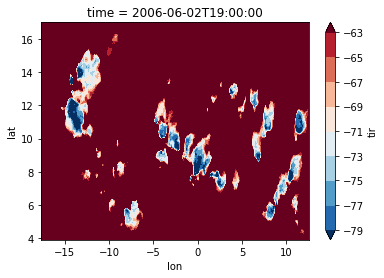

In [8]:
(tstep_old['tir']/100).plot.contourf(levels=np.arange(-79,-62,2))

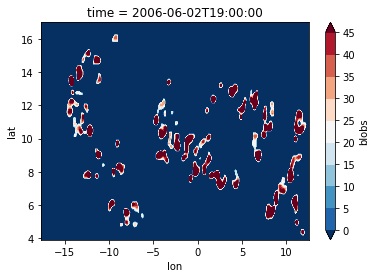

In [9]:
tstep_old['blobs'].plot.contourf(levels=np.arange(0,50,5))

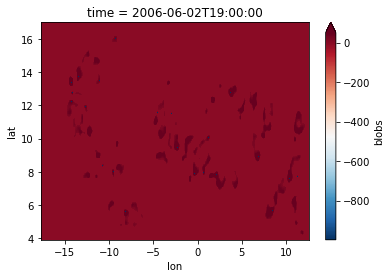

In [10]:
tstep_old['blobs'].plot.pcolormesh(vmin=-999, vmax=50, cmap='RdBu_r')

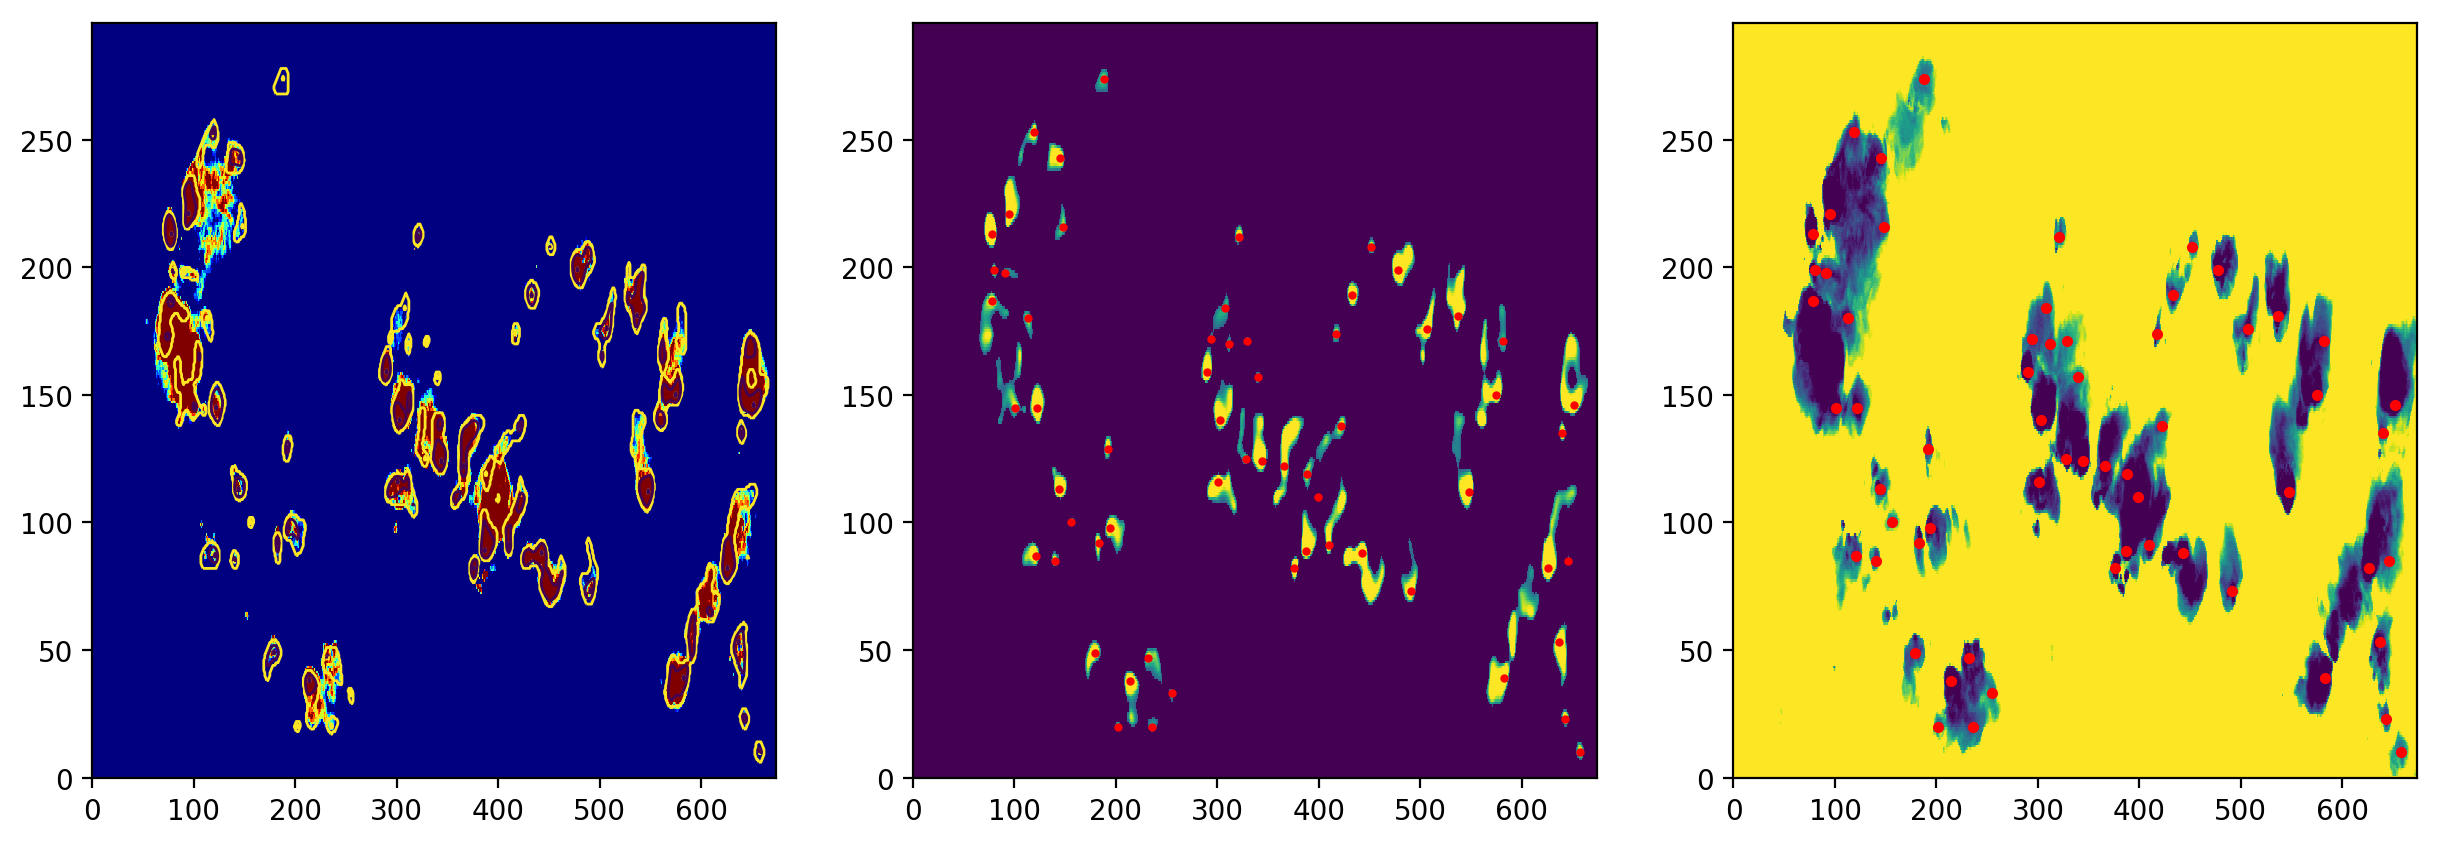

In [11]:
lon, lat = np.meshgrid(tstep_old['lon'], tstep_old['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep_old['tir']/100, vmin=-75, vmax=-70, cmap='jet_r')
plt.contour(tstep_old['blobs'], levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep_old['blobs']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep_old['blobs'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep_old['tir']/100, vmax=-55, vmin=-75)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    

f.savefig('/home/ck/DIR/cornkle/data/test/old_cores'+tag+'.png')


In [12]:
meteosat_data = tstep_old['tir'].values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
outt, nogood, t_thresh_size, t_thresh_cut, pix_nb, area_img = utils.filter_img(meteosat_data, 5)

outmin -90.65 32.25


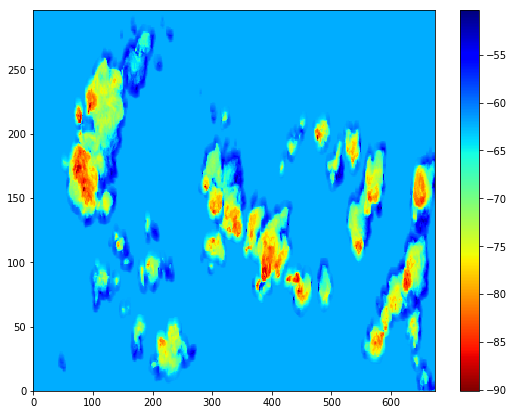

In [13]:
plt.figure(figsize=(9,7))
plt.pcolormesh(outt, cmap='jet_r')
plt.colorbar()

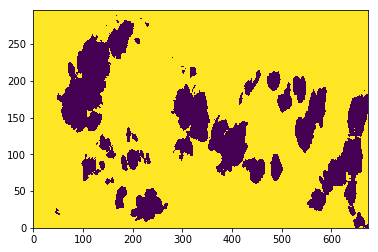

In [14]:
plt.pcolormesh(nogood)

In [15]:
wav = wavelet.waveletT(outt, dataset='METEOSAT5K_vera')

In [16]:
wav.keys()

dict_keys(['power', 'scales', 'res', 'coeffs'])

In [17]:
wav['power'].shape

(3, 296, 674)

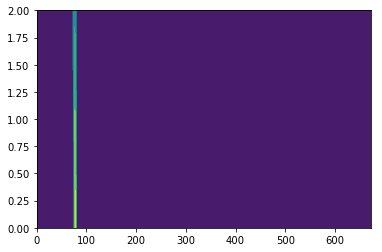

In [18]:
plt.contourf(wav['power'][:,210,:])

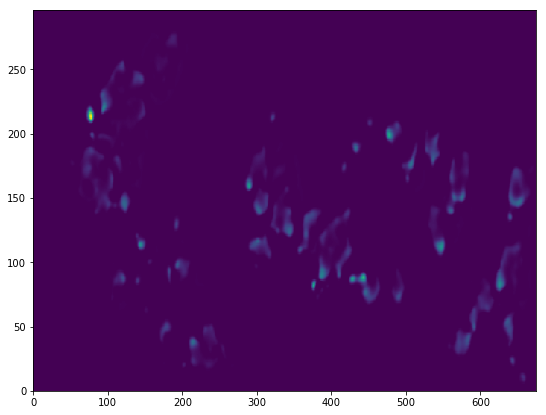

In [19]:
plt.figure(figsize=(9,7))
plt.pcolormesh(wav['power'].sum(axis=0))

In [20]:
power_msg = utils.find_dominant_power(wav, nogood, area_img, 5, dataset='MSG')

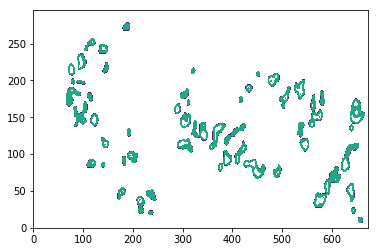

In [21]:
plt.contourf(power_msg,levels=[0,10,50])

In [22]:
meteosat_data = tstep_old['tir'].copy().values/100
latitudes = tstep_old.lat
longitudes = tstep_old.lon
date = tstep_old.time
savefile = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [23]:
run_powerBlobs.wavelet_analysis(meteosat_data, longitudes, latitudes, date, savefile, data_resolution=5)

outmin -90.65 32.25
Saved /home/ck/DIR/cornkle/data/test/testblob.nc


<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674)
Coordinates:
    time     datetime64[ns] 2006-06-02T19:00:00
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
Data variables:
    blobs    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tir      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    radii:              [1 2 3 4 5]
    scales_rounded:     [17 23 32 43 59]
    scales_original:    [17.         23.22268436 31.72312171 43.33506133 59.1...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

In [24]:
newtest = '/home/ck/DIR/cornkle/data/test/testblob.nc'

In [25]:
data = xr.open_dataset(newtest).load()#.sel(lat=slice(6,8), lon=slice(6,9.5))
tstep = data

In [26]:
data

<xarray.Dataset>
Dimensions:  (lat: 296, lon: 674)
Coordinates:
    time     datetime64[ns] 2006-06-02T19:00:00
  * lat      (lat) float64 3.912 3.957 4.003 4.048 ... 16.87 16.91 16.95 17.0
  * lon      (lon) float64 -17.68 -17.64 -17.59 -17.55 ... 12.45 12.5 12.54
Data variables:
    blobs    (lat, lon) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    tir      (lat, lon) int16 0 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0 0
Attributes:
    radii:              [1 2 3 4 5]
    scales_rounded:     [17 23 32 43 59]
    scales_original:    [17.         23.22268436 31.72312171 43.33506133 59.1...
    cutout_T:           -40
    cutout_minPixelNb:  78.53981633974483

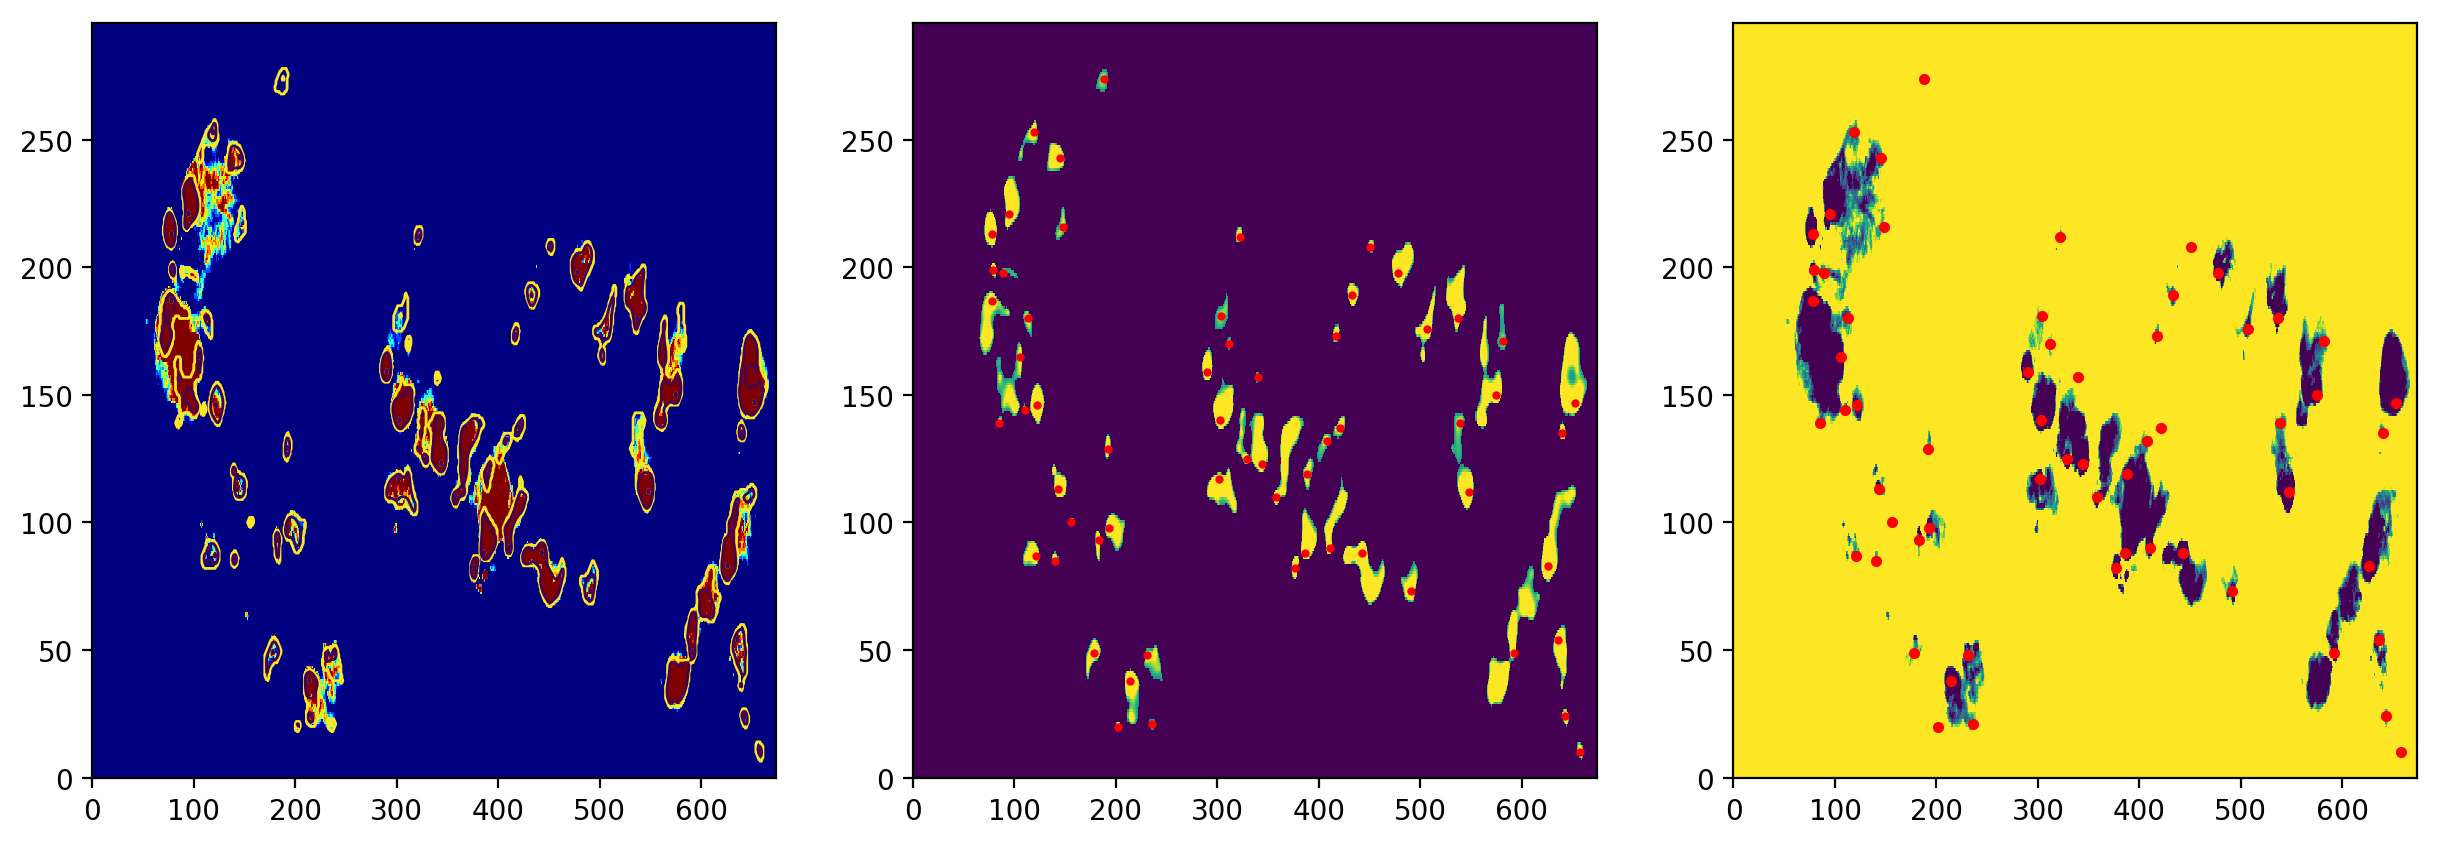

In [29]:
lon, lat = np.meshgrid(tstep['lon'], tstep['lat'])

f = plt.figure(figsize=(15,5), dpi=200)
f.add_subplot(131)
plt.pcolormesh(tstep['tir']/100, vmin=-75, vmax=-70, cmap='jet_r')
plt.contour(tstep['blobs'], levels=[0,50], extend='both', linewidths=1, cmap='viridis_r')

npos = np.where(tstep['blobs']<-100)

f.add_subplot(132)
plt.pcolormesh(tstep['blobs'], vmin=0, vmax=50)
    
for y,x in zip(npos[0], npos[1]):
    

    plt.plot(x,y, color='red', markersize=2, marker='o')

    
f.add_subplot(133)
plt.pcolormesh(tstep['tir']/100, vmax=-70, vmin=-75)
for y,x in zip(npos[0], npos[1]):
    
    plt.plot(x,y, color='red', markersize=3, marker='o')
    
f.savefig('/home/ck/DIR/cornkle/data/test/new_cores'+tag+'.png')

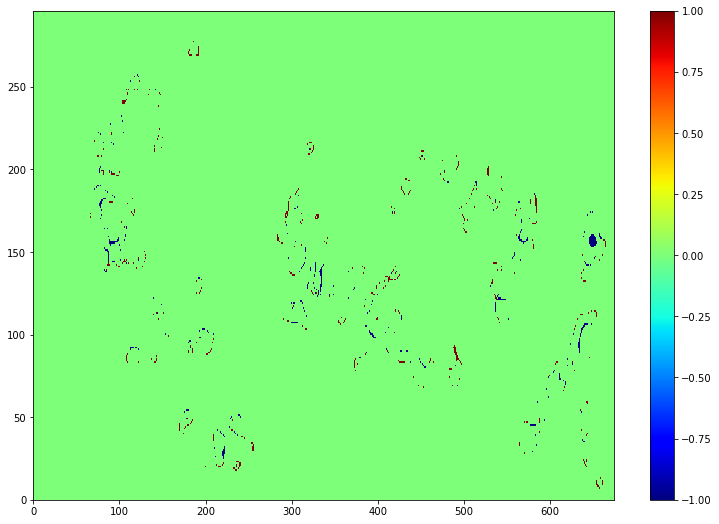

In [28]:
old_mask = np.array(tstep_old['blobs'].values > 0, dtype=int)
new_mask = np.array(tstep['blobs'].values > 0, dtype=int)
plt.figure(figsize=(13,9))
plt.pcolormesh(old_mask-new_mask, vmin=-1, vmax=1, cmap='jet')
plt.colorbar()